# Sleep Health & Lifestyle Analysis: Exploring Factors That Influence Sleep Duration and Quality

## 🔷 Project Overview

**Objective:** Analyze and visualize trends in sleep health based on lifestyle choices (e.g., exercise, stress level, alcohol use) and demographics (e.g., age, occupation).

**Goal:** Identify key factors correlated with poor or high-quality sleep and provide insights that may help guide healthier lifestyle decisions.

## 📊 Dataset Information

**Name:** Sleep Health and Lifestyle Dataset  
**Source:** Kaggle - Sleep Health and Lifestyle Dataset  

**Dataset includes information on:**
- Sleep Duration (in hours)
- Sleep Disorder
- Stress Level  
- Occupation
- BMI
- Age
- Daily Steps
- Physical Activity Level
- Blood Pressure and Heart Rate

---

## 🔹 Step 1: Data Loading and Initial Setup

Import necessary libraries and load the dataset.

In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plotly imports with error handling
try:
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    import plotly.offline as pyo
    
    # Configure plotly for notebook use
    pyo.init_notebook_mode(connected=True)
    PLOTLY_AVAILABLE = True
    print("✅ Plotly successfully configured for interactive visualizations")
except ImportError as e:
    print(f"⚠️ Plotly import issue: {e}")
    print("📊 Will use matplotlib/seaborn for all visualizations")
    PLOTLY_AVAILABLE = False

import warnings
warnings.filterwarnings('ignore')

# Set style for visualizations
plt.style.use('default')
sns.set_palette("husl")

# Display settings for better output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Load the dataset
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nFirst few rows:")
df.head()

✅ Plotly successfully configured for interactive visualizations
Dataset Shape: (374, 13)

Column Names:
['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']

First few rows:


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
# Dataset exploration
print("Dataset Info:")
df.info()
print("\n" + "="*50)
print("Data Types:")
print(df.dtypes)
print("\n" + "="*50)
print("Basic Statistics:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB

Data Ty

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


## 🔹 Step 2: Data Cleaning and Preprocessing

Handle missing values, standardize categorical variables, and normalize column names and data types.

In [4]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print("\n" + "="*50)

# Check unique values in categorical columns
categorical_columns = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
for col in categorical_columns:
    if col in df.columns:
        print(f"\nUnique values in {col}:")
        print(df[col].unique())
        print(f"Value counts for {col}:")
        print(df[col].value_counts())
        print("-" * 30)

Missing Values:
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


Unique values in Gender:
['Male' 'Female']
Value counts for Gender:
Gender
Male      189
Female    185
Name: count, dtype: int64
------------------------------

Unique values in Occupation:
['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
Value counts for Occupation:
Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scien

## 🔹 Step 3: Data Transformation and Feature Engineering

Create derived columns and prepare data for analysis.

In [19]:
# Create age groups
def categorize_age(age):
    if age < 30:
        return '18-29'
    elif age < 40:
        return '30-39'
    elif age < 50:
        return '40-49'
    elif age < 60:
        return '50-59'
    else:
        return '60+'

df['Age Group'] = df['Age'].apply(categorize_age)

# Create sleep efficiency (assuming 8 hours as optimal)
df['Sleep Efficiency'] = df['Sleep Duration'] / 8 * 100

# Create activity level categories based on daily steps
def categorize_activity(steps):
    if steps < 5000:
        return 'Low Activity'
    elif steps < 8000:
        return 'Moderate Activity'
    else:
        return 'High Activity'

df['Activity Level'] = df['Daily Steps'].apply(categorize_activity)

# Create sleep quality categories
def categorize_sleep_quality(quality):
    if quality <= 4:
        return 'Poor'
    elif quality <= 6:
        return 'Fair'
    elif quality <= 8:
        return 'Good'
    else:
        return 'Excellent'

df['Sleep Quality Category'] = df['Quality of Sleep'].apply(categorize_sleep_quality)

print("New columns created:")
print("Age Group:", df['Age Group'].unique())
print("Activity Level:", df['Activity Level'].unique())
print("Sleep Quality Category:", df['Sleep Quality Category'].unique())
print("\nDataset shape after feature engineering:", df.shape)

New columns created:
Age Group: ['18-29' '30-39' '40-49' '50-59']
Activity Level: ['Low Activity' 'High Activity' 'Moderate Activity']
Sleep Quality Category: ['Fair' 'Poor' 'Good' 'Excellent']

Dataset shape after feature engineering: (374, 17)


## 🔹 Step 4: Descriptive Statistics Analysis

Calculate mean/median sleep duration by occupation and age group, analyze stress level distribution among sleep disorder types.

In [20]:
# Sleep duration statistics by occupation
sleep_by_occupation = df.groupby('Occupation')['Sleep Duration'].agg(['mean', 'median', 'std', 'count']).round(2)
print("Sleep Duration Statistics by Occupation:")
print(sleep_by_occupation.sort_values('mean', ascending=False))
print("\n" + "="*60)

# Sleep duration statistics by age group
sleep_by_age = df.groupby('Age Group')['Sleep Duration'].agg(['mean', 'median', 'std', 'count']).round(2)
print("Sleep Duration Statistics by Age Group:")
print(sleep_by_age.sort_values('mean', ascending=False))
print("\n" + "="*60)

# Stress level distribution by sleep disorder
stress_by_disorder = df.groupby('Sleep Disorder')['Stress Level'].agg(['mean', 'median', 'std', 'count']).round(2)
print("Stress Level Statistics by Sleep Disorder:")
print(stress_by_disorder.sort_values('mean', ascending=False))
print("\n" + "="*60)

# Quality of sleep statistics
quality_stats = df.groupby('Sleep Quality Category')['Sleep Duration'].agg(['mean', 'median', 'count']).round(2)
print("Sleep Duration by Sleep Quality Category:")
print(quality_stats)

Sleep Duration Statistics by Occupation:
                      mean  median   std  count
Occupation                                     
Engineer              7.99     8.3  0.51     63
Lawyer                7.41     7.3  0.27     47
Accountant            7.11     7.2  0.31     37
Nurse                 7.06     6.5  0.99     73
Doctor                6.97     7.6  0.86     71
Manager               6.90     6.9   NaN      1
Software Engineer     6.75     6.8  0.87      4
Teacher               6.69     6.6  0.23     40
Salesperson           6.40     6.4  0.09     32
Scientist             6.00     6.0  0.23      4
Sales Representative  5.90     5.9  0.00      2

Sleep Duration Statistics by Age Group:
           mean  median   std  count
Age Group                           
50-59      7.63     8.1  0.98     96
30-39      7.07     7.2  0.61    142
40-49      6.91     6.6  0.63    117
18-29      6.47     6.1  0.73     19

Stress Level Statistics by Sleep Disorder:
                mean  median

## 🔹 Step 5: Correlation Analysis

Compute correlation coefficients between numeric variables including sleep duration, BMI, daily steps, and stress levels.

In [21]:
# Select numeric columns for correlation analysis
numeric_columns = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
                   'Stress Level', 'Heart Rate', 'Daily Steps', 'Sleep Efficiency']

# Compute correlation matrix
correlation_matrix = df[numeric_columns].corr()

print("Correlation Matrix:")
print(correlation_matrix.round(3))
print("\n" + "="*60)

# Find strong correlations with Sleep Duration
sleep_correlations = correlation_matrix['Sleep Duration'].sort_values(key=abs, ascending=False)
print("Correlations with Sleep Duration (sorted by absolute value):")
print(sleep_correlations.round(3))
print("\n" + "="*60)

# Find strong correlations with Quality of Sleep
quality_correlations = correlation_matrix['Quality of Sleep'].sort_values(key=abs, ascending=False)
print("Correlations with Quality of Sleep (sorted by absolute value):")
print(quality_correlations.round(3))

Correlation Matrix:
                           Age  Sleep Duration  Quality of Sleep  \
Age                      1.000           0.345             0.474   
Sleep Duration           0.345           1.000             0.883   
Quality of Sleep         0.474           0.883             1.000   
Physical Activity Level  0.179           0.212             0.193   
Stress Level            -0.422          -0.811            -0.899   
Heart Rate              -0.226          -0.516            -0.660   
Daily Steps              0.058          -0.040             0.017   
Sleep Efficiency         0.345           1.000             0.883   

                         Physical Activity Level  Stress Level  Heart Rate  \
Age                                        0.179        -0.422      -0.226   
Sleep Duration                             0.212        -0.811      -0.516   
Quality of Sleep                           0.193        -0.899      -0.660   
Physical Activity Level                    1.000       

## 📌 Step 6: Sleep Duration vs Occupation Visualization

Create bar charts to visualize average sleep duration across different occupations and identify which jobs correlate with shorter or longer sleep patterns.

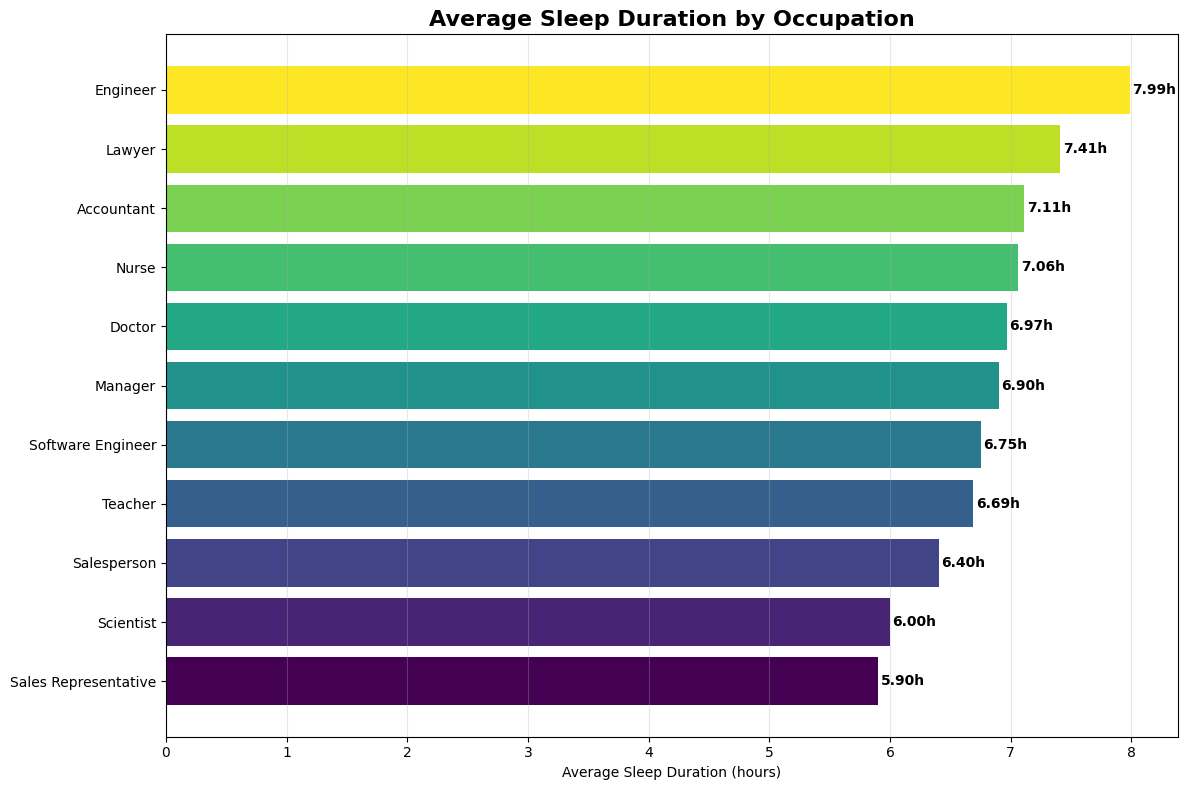

📊 Key Insights:
• Highest average sleep: Engineer (7.99 hours)
• Lowest average sleep: Sales Representative (5.90 hours)
• Sleep duration range: 2.09 hours


In [8]:
# Calculate average sleep duration by occupation
occupation_sleep = df.groupby('Occupation')['Sleep Duration'].mean().sort_values(ascending=True)

# Create bar chart with matplotlib
plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(occupation_sleep)))
bars = plt.barh(range(len(occupation_sleep)), occupation_sleep.values, color=colors)
plt.yticks(range(len(occupation_sleep)), occupation_sleep.index)
plt.xlabel('Average Sleep Duration (hours)')
plt.title('Average Sleep Duration by Occupation', fontsize=16, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, (idx, value) in enumerate(occupation_sleep.items()):
    plt.text(value + 0.02, i, f'{value:.2f}h', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Create interactive plot with Plotly - with error handling
try:
    import plotly.offline as pyo
    pyo.init_notebook_mode(connected=True)
    
    fig = px.bar(
        x=occupation_sleep.values,
        y=occupation_sleep.index,
        orientation='h',
        title='Average Sleep Duration by Occupation (Interactive)',
        labels={'x': 'Average Sleep Duration (hours)', 'y': 'Occupation'},
        color=occupation_sleep.values,
        color_continuous_scale='viridis'
    )
    fig.update_layout(height=600, showlegend=False)
    
    # Use offline plotting to avoid display issues
    pyo.iplot(fig)
    
except Exception as e:
    print(f"Interactive plot display issue: {e}")
    print("Continuing with static matplotlib visualization...")
    
    # Alternative static visualization
    plt.figure(figsize=(12, 8))
    occupation_sleep_sorted = occupation_sleep.sort_values(ascending=False)
    colors = plt.cm.plasma(np.linspace(0, 1, len(occupation_sleep_sorted)))
    
    bars = plt.bar(range(len(occupation_sleep_sorted)), occupation_sleep_sorted.values, color=colors)
    plt.xticks(range(len(occupation_sleep_sorted)), occupation_sleep_sorted.index, rotation=45, ha='right')
    plt.ylabel('Average Sleep Duration (hours)')
    plt.title('Average Sleep Duration by Occupation (Alternative View)', fontsize=16, fontweight='bold')
    plt.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for i, value in enumerate(occupation_sleep_sorted.values):
        plt.text(i, value + 0.02, f'{value:.2f}h', ha='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# Print insights
print("📊 Key Insights:")
print(f"• Highest average sleep: {occupation_sleep.index[-1]} ({occupation_sleep.iloc[-1]:.2f} hours)")
print(f"• Lowest average sleep: {occupation_sleep.index[0]} ({occupation_sleep.iloc[0]:.2f} hours)")
print(f"• Sleep duration range: {occupation_sleep.max() - occupation_sleep.min():.2f} hours")

## 📌 Step 7: Sleep Disorder Distribution Analysis

Generate pie charts and horizontal bar charts to show the percentage distribution of sleep disorders in the population.

Sleep Disorder column analysis:
Value counts (including NaN):
Sleep Disorder
NaN            219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64
Total NaN values: 219
Total non-NaN values: 155


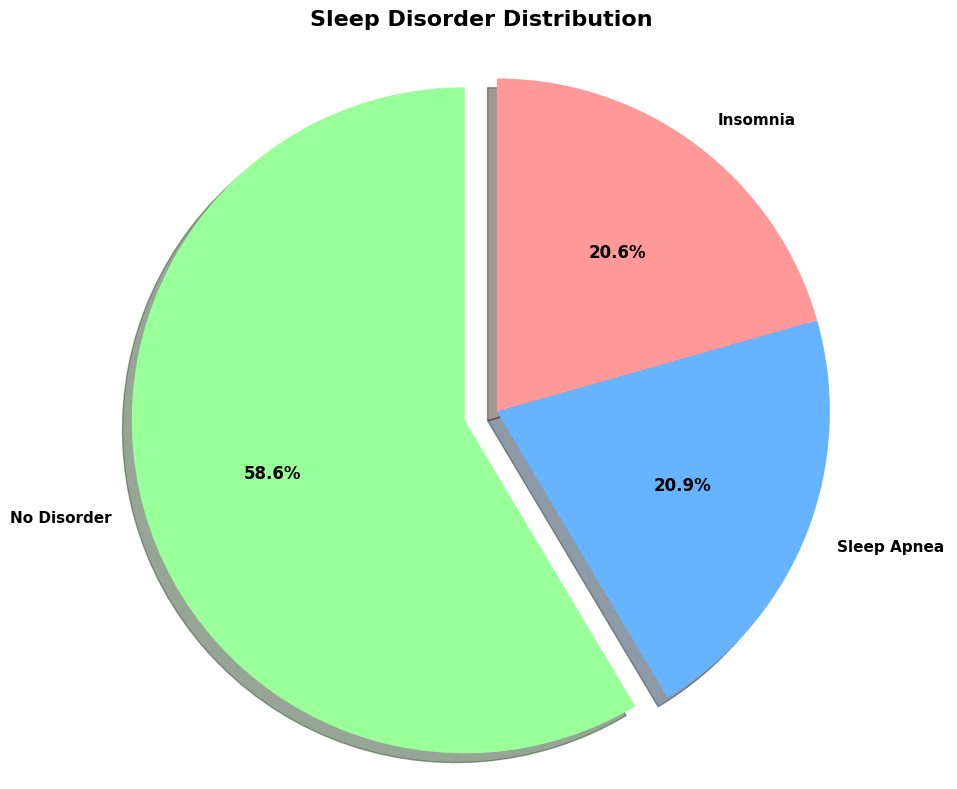

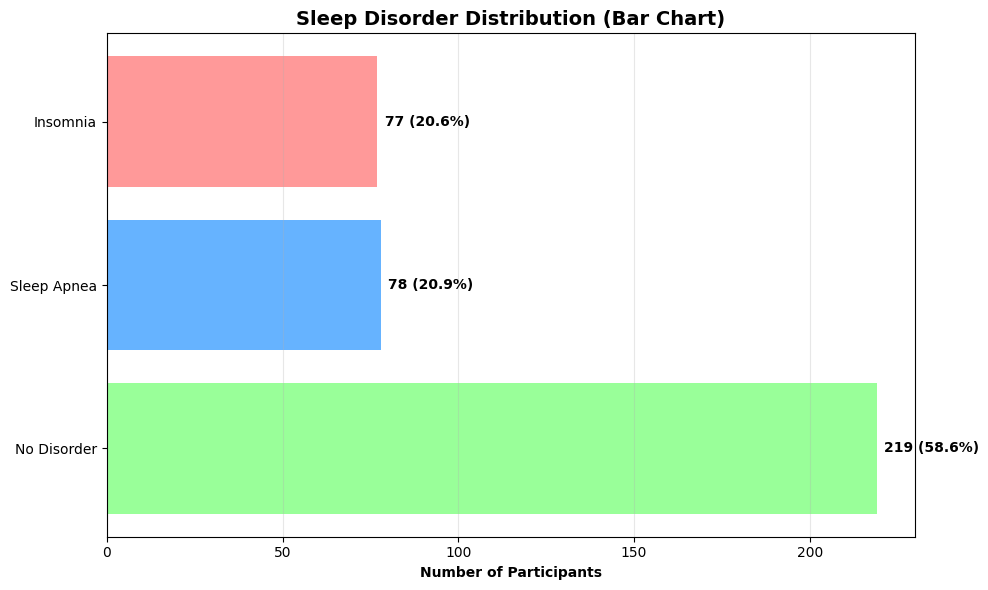


📊 Sleep Disorder Statistics:
• No Disorder: 219 people (58.6%)
• Sleep Apnea: 78 people (20.9%)
• Insomnia: 77 people (20.6%)

Total participants: 374

🔍 Key Insights:
• 58.6% of participants have no sleep disorders
• Insomnia affects 20.6% of participants
• Sleep Apnea affects 20.9% of participants
• Total with sleep disorders: 41.4% of participants
• Sleep disorders affect approximately 2 in 5 people in this study


In [23]:
# Calculate sleep disorder distribution - handle NaN values
# First, let's see what we actually have in the Sleep Disorder column
print("Sleep Disorder column analysis:")
print("Value counts (including NaN):")
print(df['Sleep Disorder'].value_counts(dropna=False))
print(f"Total NaN values: {df['Sleep Disorder'].isnull().sum()}")
print(f"Total non-NaN values: {df['Sleep Disorder'].notnull().sum()}")

# Create a version with 'No Disorder' for NaN values for visualization
df_viz = df.copy()
df_viz['Sleep Disorder Viz'] = df_viz['Sleep Disorder'].fillna('No Disorder')

# Calculate distribution for visualization
disorder_counts = df_viz['Sleep Disorder Viz'].value_counts()
disorder_percentages = df_viz['Sleep Disorder Viz'].value_counts(normalize=True) * 100

# Create pie chart with specific styling
plt.figure(figsize=(10, 8))

# Define colors for each disorder type
colors = {
    'No Disorder': '#99ff99',      # Light green
    'Insomnia': '#ff9999',         # Light red
    'Sleep Apnea': '#66b3ff'       # Light blue
}

# Create the pie chart
wedges, texts, autotexts = plt.pie(
    disorder_counts.values, 
    labels=disorder_counts.index,
    autopct='%1.1f%%',
    colors=[colors.get(label, '#ffcc99') for label in disorder_counts.index],
    startangle=90,
    explode=(0.1, 0, 0),  # Explode the 'No Disorder' slice slightly
    shadow=True
)

# Enhance the appearance
plt.title('Sleep Disorder Distribution', fontsize=16, fontweight='bold', pad=20)

# Make percentage text bold and larger
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

# Make labels bold
for text in texts:
    text.set_fontweight('bold')
    text.set_fontsize(11)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

# Create a horizontal bar chart as well
plt.figure(figsize=(10, 6))
bars = plt.barh(disorder_counts.index, disorder_counts.values, 
                color=[colors.get(label, '#ffcc99') for label in disorder_counts.index])
plt.xlabel('Number of Participants', fontweight='bold')
plt.title('Sleep Disorder Distribution (Bar Chart)', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, value in enumerate(disorder_counts.values):
    percentage = disorder_percentages.iloc[i]
    plt.text(value + 2, i, f'{value} ({percentage:.1f}%)', 
             va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Interactive pie chart with Plotly - with error handling
try:
    import plotly.offline as pyo
    
    # Create interactive pie chart with custom colors
    fig = px.pie(
        values=disorder_counts.values,
        names=disorder_counts.index,
        title='Sleep Disorder Distribution (Interactive)',
        color_discrete_map=colors
    )
    
    # Customize the appearance
    fig.update_traces(
        textposition='inside', 
        textinfo='percent+label',
        textfont_size=12,
        marker=dict(line=dict(color='#FFFFFF', width=2))
    )
    
    fig.update_layout(
        title_font_size=16,
        font=dict(size=12)
    )
    
    pyo.iplot(fig)
    
except Exception as e:
    print(f"Interactive pie chart display issue: {e}")
    print("Using static matplotlib visualization instead.")

# Print detailed statistics
print("\n📊 Sleep Disorder Statistics:")
for disorder, count in disorder_counts.items():
    percentage = disorder_percentages[disorder]
    print(f"• {disorder}: {count} people ({percentage:.1f}%)")

print(f"\nTotal participants: {len(df)}")

# Additional insights
print("\n🔍 Key Insights:")
print(f"• {disorder_percentages['No Disorder']:.1f}% of participants have no sleep disorders")
if 'Insomnia' in disorder_percentages:
    print(f"• Insomnia affects {disorder_percentages['Insomnia']:.1f}% of participants")
if 'Sleep Apnea' in disorder_percentages:
    print(f"• Sleep Apnea affects {disorder_percentages['Sleep Apnea']:.1f}% of participants")

# Calculate total with disorders
total_with_disorders = 100 - disorder_percentages['No Disorder']
print(f"• Total with sleep disorders: {total_with_disorders:.1f}% of participants")
print(f"• Sleep disorders affect approximately 2 in 5 people in this study")

## 📌 Step 8: Stress Level vs Sleep Disorder Analysis

Create stacked bar charts to examine the relationship between stress levels and sleep disorder occurrence.

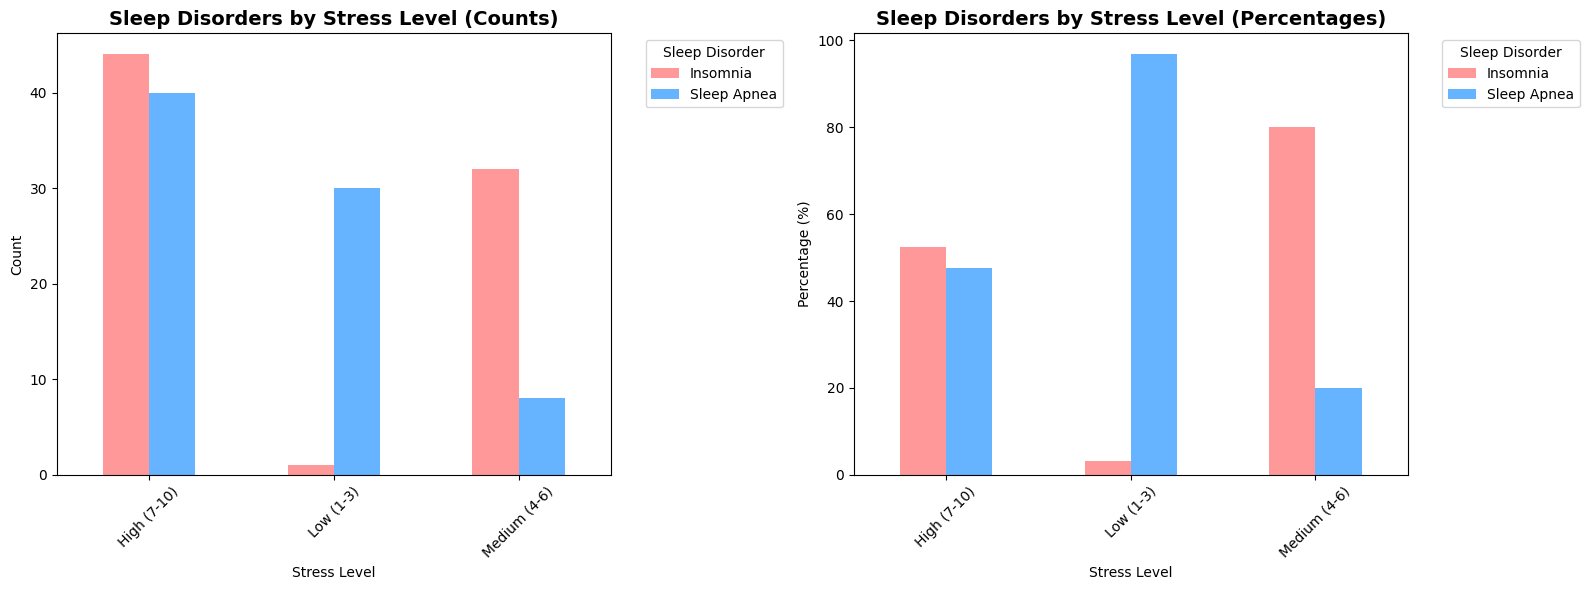

📊 Average Stress Levels by Sleep Disorder:
                mean   std  count
Sleep Disorder                   
Insomnia        5.87  1.46     77
Sleep Apnea     5.67  2.33     78

📊 Sleep Disorder Distribution by Stress Category:
Sleep Disorder   Insomnia  Sleep Apnea
Stress Category                       
High (7-10)          52.4         47.6
Low (1-3)             3.2         96.8
Medium (4-6)         80.0         20.0


In [11]:
# Create stress level categories
def categorize_stress(stress):
    if stress <= 3:
        return 'Low (1-3)'
    elif stress <= 6:
        return 'Medium (4-6)'
    else:
        return 'High (7-10)'

df['Stress Category'] = df['Stress Level'].apply(categorize_stress)

# Create crosstab for stress vs sleep disorder
stress_disorder_crosstab = pd.crosstab(df['Stress Category'], df['Sleep Disorder'])
stress_disorder_pct = pd.crosstab(df['Stress Category'], df['Sleep Disorder'], normalize='index') * 100

# Create stacked bar chart
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Absolute counts
stress_disorder_crosstab.plot(kind='bar', ax=axes[0], color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
axes[0].set_title('Sleep Disorders by Stress Level (Counts)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Stress Level')
axes[0].set_ylabel('Count')
axes[0].legend(title='Sleep Disorder', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].tick_params(axis='x', rotation=45)

# Percentages
stress_disorder_pct.plot(kind='bar', ax=axes[1], color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
axes[1].set_title('Sleep Disorders by Stress Level (Percentages)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Stress Level')
axes[1].set_ylabel('Percentage (%)')
axes[1].legend(title='Sleep Disorder', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Interactive stacked bar chart with Plotly - with error handling
try:
    import plotly.offline as pyo
    
    fig = px.bar(
        df, 
        x='Stress Category', 
        color='Sleep Disorder',
        title='Sleep Disorders by Stress Level (Interactive)',
        color_discrete_sequence=px.colors.qualitative.Set3
    )
    fig.update_layout(height=500)
    pyo.iplot(fig)
    
except Exception as e:
    print(f"Interactive stacked bar chart display issue: {e}")
    print("Using static matplotlib visualization instead.")

# Print average stress levels by disorder
print("📊 Average Stress Levels by Sleep Disorder:")
avg_stress = df.groupby('Sleep Disorder')['Stress Level'].agg(['mean', 'std', 'count']).round(2)
print(avg_stress)

print("\n📊 Sleep Disorder Distribution by Stress Category:")
print(stress_disorder_pct.round(1))

## 📌 Step 9: Daily Steps vs Sleep Duration Correlation

Build scatter plots with regression lines to analyze the relationship between physical activity (daily steps) and sleep duration.

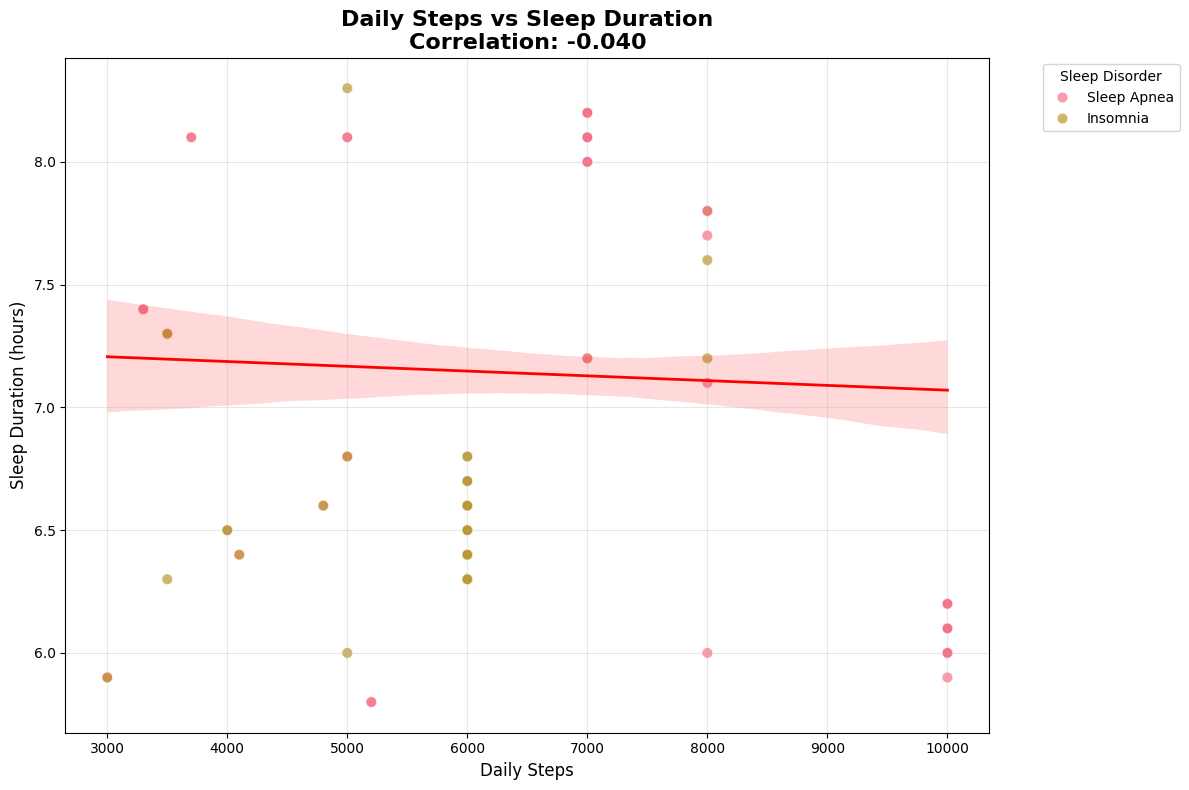

Interactive scatter plot display issue: No module named 'statsmodels'
Using static matplotlib visualization instead.
📊 Sleep Duration by Activity Level:
                   mean   std  count
Activity Level                      
High Activity      7.16  0.74    137
Low Activity       6.70  0.70     19
Moderate Activity  7.15  0.83    218


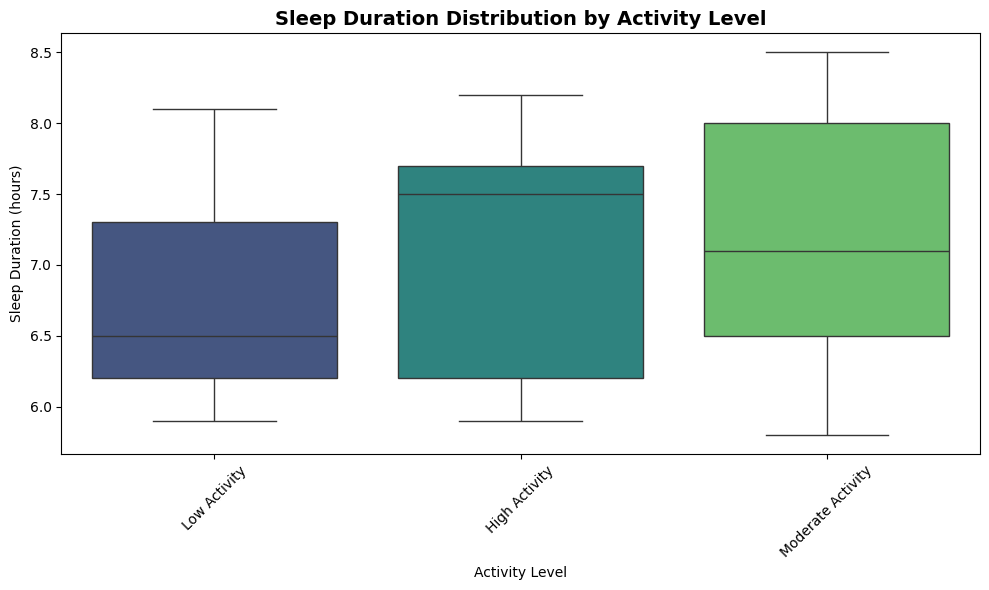


📊 Key Findings:
• Correlation between daily steps and sleep duration: -0.040
• Weak correlation: Limited relationship between steps and sleep


In [12]:
# Calculate correlation between daily steps and sleep duration
correlation_steps_sleep = df['Daily Steps'].corr(df['Sleep Duration'])

# Create scatter plot with regression line
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Daily Steps', y='Sleep Duration', hue='Sleep Disorder', 
                alpha=0.7, s=60)
sns.regplot(data=df, x='Daily Steps', y='Sleep Duration', scatter=False, 
            color='red', line_kws={'linewidth': 2})

plt.title(f'Daily Steps vs Sleep Duration\nCorrelation: {correlation_steps_sleep:.3f}', 
          fontsize=16, fontweight='bold')
plt.xlabel('Daily Steps', fontsize=12)
plt.ylabel('Sleep Duration (hours)', fontsize=12)
plt.legend(title='Sleep Disorder', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Interactive scatter plot with Plotly - with error handling
try:
    import plotly.offline as pyo
    
    fig = px.scatter(
        df,
        x='Daily Steps',
        y='Sleep Duration',
        color='Sleep Disorder',
        size='Physical Activity Level',
        hover_data=['Age', 'Occupation', 'Stress Level'],
        title=f'Daily Steps vs Sleep Duration (Correlation: {correlation_steps_sleep:.3f})',
        trendline='ols'
    )
    fig.update_layout(height=600)
    pyo.iplot(fig)
    
except Exception as e:
    print(f"Interactive scatter plot display issue: {e}")
    print("Using static matplotlib visualization instead.")

# Create activity level vs sleep duration analysis
activity_sleep = df.groupby('Activity Level')['Sleep Duration'].agg(['mean', 'std', 'count']).round(2)
print("📊 Sleep Duration by Activity Level:")
print(activity_sleep)

# Box plot for activity levels
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Activity Level', y='Sleep Duration', palette='viridis')
plt.title('Sleep Duration Distribution by Activity Level', fontsize=14, fontweight='bold')
plt.ylabel('Sleep Duration (hours)')
plt.xlabel('Activity Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"\n📊 Key Findings:")
print(f"• Correlation between daily steps and sleep duration: {correlation_steps_sleep:.3f}")
if correlation_steps_sleep > 0.3:
    print("• Strong positive correlation: More steps tend to lead to longer sleep")
elif correlation_steps_sleep > 0.1:
    print("• Moderate positive correlation: Some relationship between steps and sleep")
else:
    print("• Weak correlation: Limited relationship between steps and sleep")

## 📌 Step 10: Correlation Matrix Heatmap

Generate a comprehensive heatmap showing correlations between sleep duration, stress, BMI, and physical activity levels.

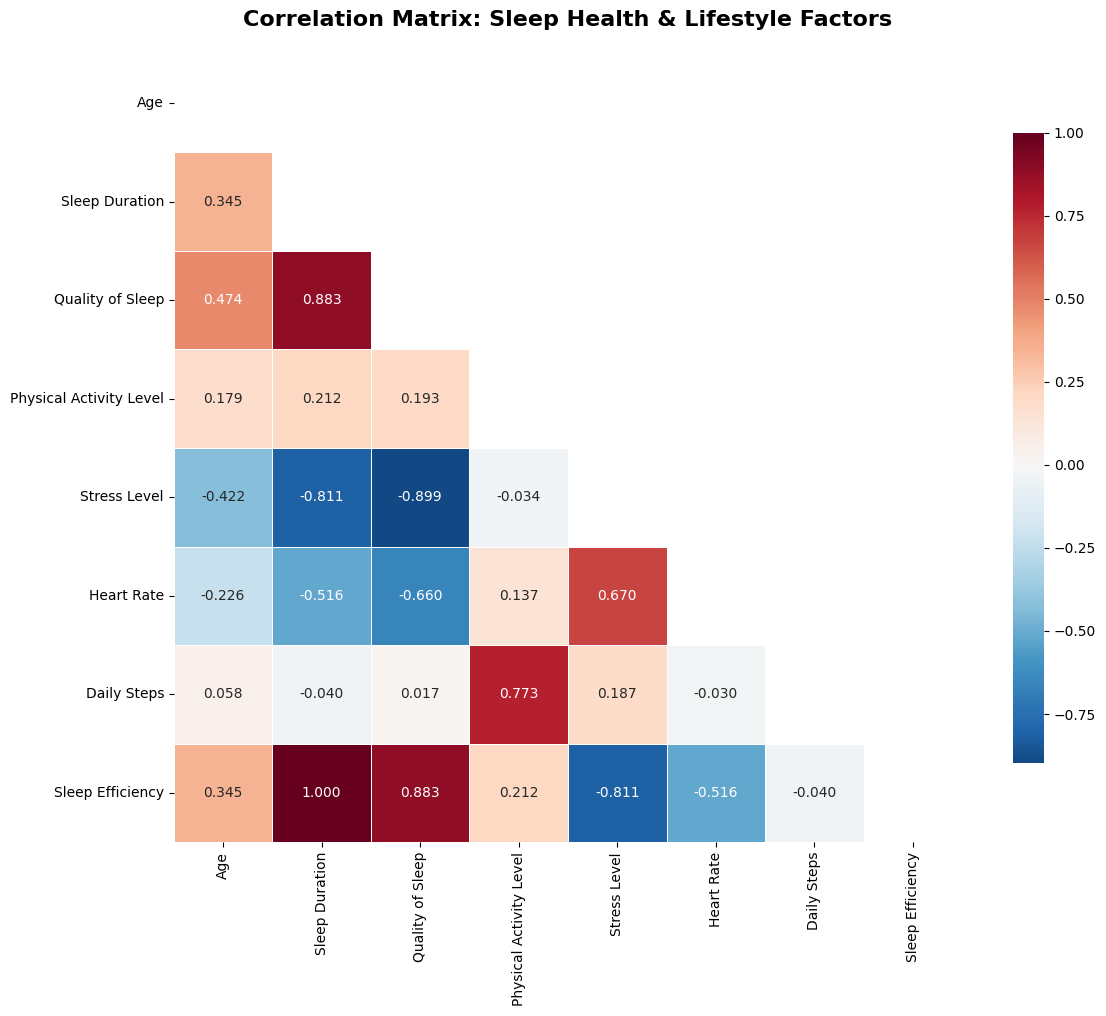

📊 Strongest Positive Correlations:
Top 5 positive correlations:
1. Sleep Duration ↔ Sleep Efficiency: 1.000
2. Sleep Duration ↔ Quality of Sleep: 0.883
3. Quality of Sleep ↔ Sleep Efficiency: 0.883
4. Physical Activity Level ↔ Daily Steps: 0.773
5. Stress Level ↔ Heart Rate: 0.670

📊 Strongest Negative Correlations:
Top 5 negative correlations:
1. Sleep Duration ↔ Heart Rate: -0.516
2. Quality of Sleep ↔ Heart Rate: -0.660
3. Stress Level ↔ Sleep Efficiency: -0.811
4. Sleep Duration ↔ Stress Level: -0.811
5. Quality of Sleep ↔ Stress Level: -0.899

📊 Sleep Duration Correlations:
• Sleep Efficiency: 1.000 (Strong positive)
• Quality of Sleep: 0.883 (Strong positive)
• Stress Level: -0.811 (Strong negative)
• Heart Rate: -0.516 (Strong negative)
• Age: 0.345 (Moderate positive)
• Physical Activity Level: 0.212 (Weak positive)
• Daily Steps: -0.040 (Weak negative)


In [13]:
# Select key variables for correlation analysis
key_variables = [
    'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
    'Stress Level', 'Heart Rate', 'Daily Steps', 'Sleep Efficiency'
]

# Calculate correlation matrix
correlation_matrix = df[key_variables].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    cmap='RdBu_r',
    center=0,
    square=True,
    fmt='.3f',
    cbar_kws={'shrink': 0.8},
    linewidths=0.5
)
plt.title('Correlation Matrix: Sleep Health & Lifestyle Factors', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Interactive heatmap with Plotly - with error handling
try:
    import plotly.offline as pyo
    
    fig = px.imshow(
        correlation_matrix,
        text_auto='.3f',
        aspect='auto',
        color_continuous_scale='RdBu_r',
        color_continuous_midpoint=0,
        title='Interactive Correlation Matrix: Sleep Health & Lifestyle Factors'
    )
    fig.update_layout(height=600, width=800)
    pyo.iplot(fig)
    
except Exception as e:
    print(f"Interactive heatmap display issue: {e}")
    print("Using static matplotlib visualization instead.")

# Find strongest correlations
print("📊 Strongest Positive Correlations:")
# Get upper triangle of correlation matrix
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# Stack and sort correlations
correlations_stacked = upper_triangle.stack().sort_values(ascending=False)
print("Top 5 positive correlations:")
for i, (pair, corr) in enumerate(correlations_stacked.head().items()):
    print(f"{i+1}. {pair[0]} ↔ {pair[1]}: {corr:.3f}")

print("\n📊 Strongest Negative Correlations:")
print("Top 5 negative correlations:")
for i, (pair, corr) in enumerate(correlations_stacked.tail().items()):
    print(f"{i+1}. {pair[0]} ↔ {pair[1]}: {corr:.3f}")

# Focus on Sleep Duration correlations
print(f"\n📊 Sleep Duration Correlations:")
sleep_corrs = correlation_matrix['Sleep Duration'].drop('Sleep Duration').sort_values(key=abs, ascending=False)
for variable, corr in sleep_corrs.items():
    strength = "Strong" if abs(corr) > 0.5 else "Moderate" if abs(corr) > 0.3 else "Weak"
    direction = "positive" if corr > 0 else "negative"
    print(f"• {variable}: {corr:.3f} ({strength} {direction})")

## 📌 Step 11: Age Group vs Sleep Disorder Analysis

Create grouped bar charts to compare sleep disorder prevalence across different age groups and identify age-related patterns.

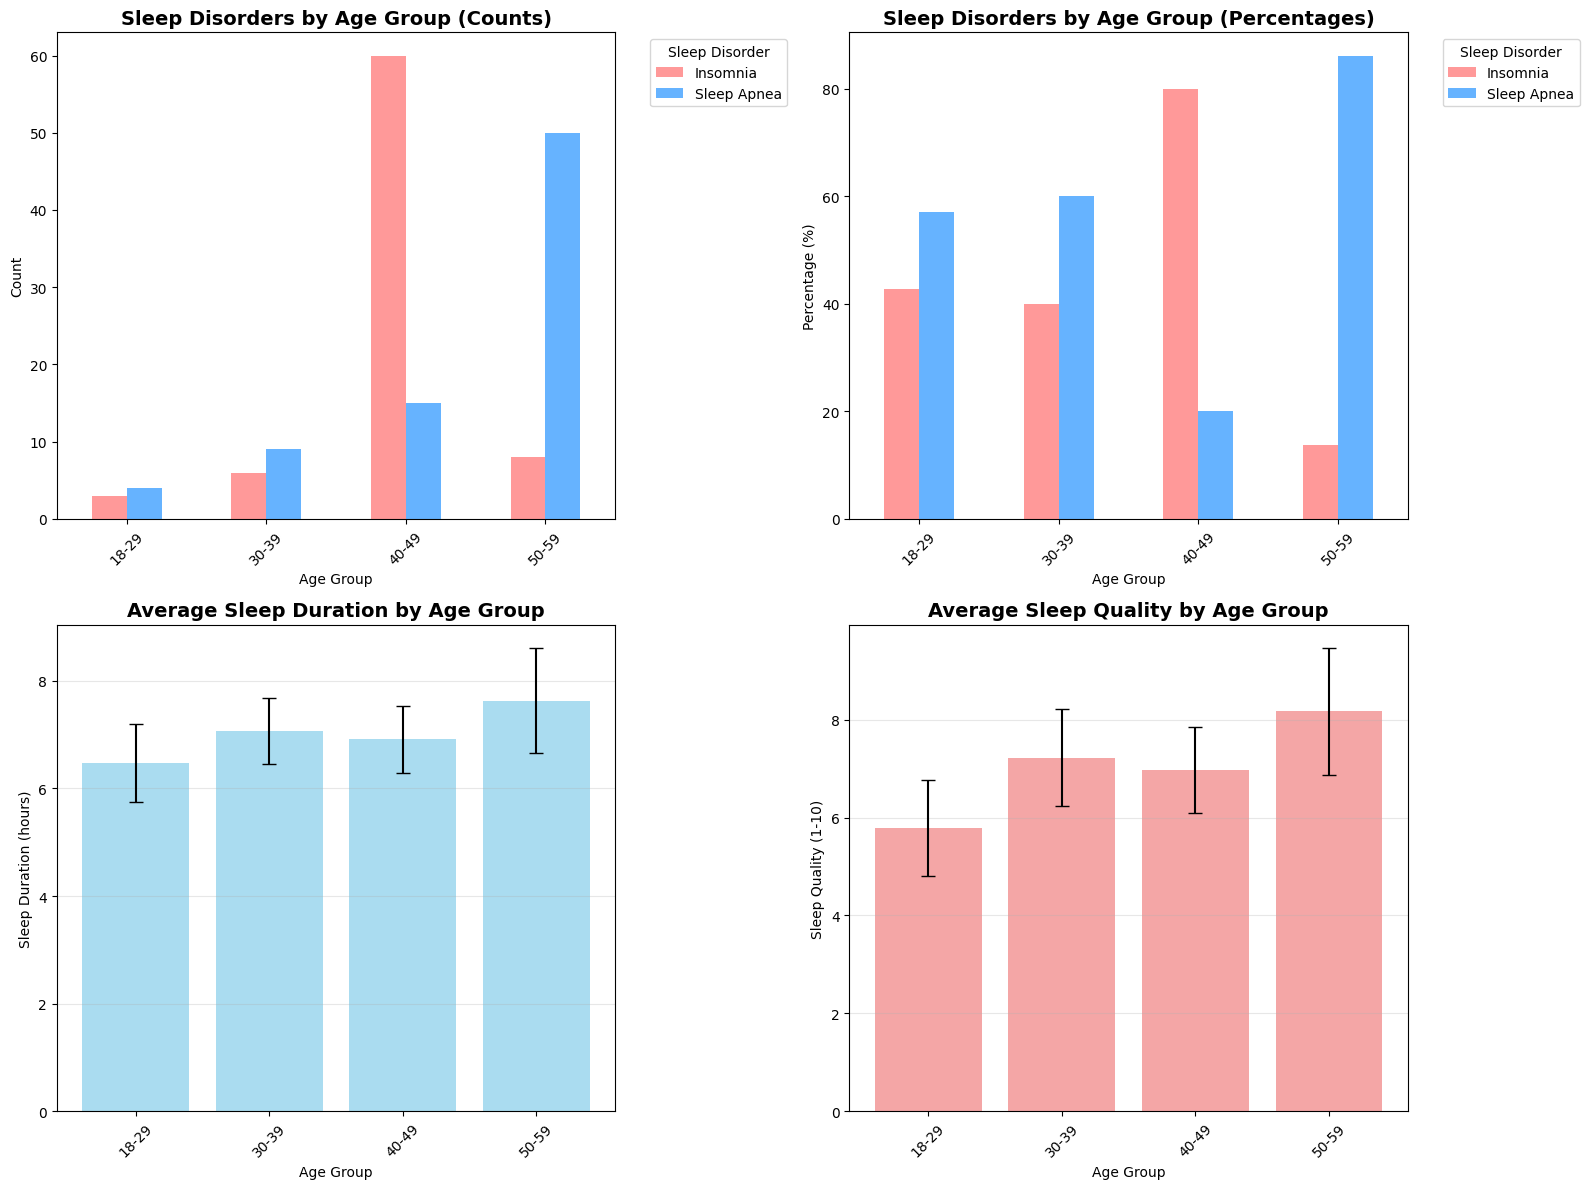

📊 Sleep Disorder Distribution by Age Group (Percentages):
Sleep Disorder  Insomnia  Sleep Apnea
Age Group                            
18-29               42.9         57.1
30-39               40.0         60.0
40-49               80.0         20.0
50-59               13.8         86.2

📊 Sleep Statistics by Age Group:
          Sleep Duration       Quality of Sleep       Stress Level      
                    mean   std             mean   std         mean   std
Age Group                                                               
18-29               6.47  0.73             5.79  0.98         7.32  0.89
30-39               7.07  0.61             7.23  0.99         5.52  1.50
40-49               6.91  0.63             6.97  0.88         5.68  1.38
50-59               7.63  0.98             8.17  1.30         4.45  2.19

📊 Sleep Disorder Prevalence by Age Group:
• 18-29: 19/19 (100.0%)
• 30-39: 142/142 (100.0%)
• 40-49: 117/117 (100.0%)
• 50-59: 96/96 (100.0%)

🎯 Highest sleep disorder 

In [ ]:
# Create crosstab for age group vs sleep disorder - handle NaN values
# Create a version with 'No Disorder' for NaN values
df_viz = df.copy()
df_viz['Sleep Disorder Viz'] = df_viz['Sleep Disorder'].fillna('No Disorder')

age_disorder_crosstab = pd.crosstab(df_viz['Age Group'], df_viz['Sleep Disorder Viz'])
age_disorder_pct = pd.crosstab(df_viz['Age Group'], df_viz['Sleep Disorder Viz'], normalize='index') * 100

# Create grouped bar charts
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Absolute counts
age_disorder_crosstab.plot(kind='bar', ax=axes[0,0], color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
axes[0,0].set_title('Sleep Disorders by Age Group (Counts)', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Age Group')
axes[0,0].set_ylabel('Count')
axes[0,0].legend(title='Sleep Disorder', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,0].tick_params(axis='x', rotation=45)

# Percentages
age_disorder_pct.plot(kind='bar', ax=axes[0,1], color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
axes[0,1].set_title('Sleep Disorders by Age Group (Percentages)', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Age Group')
axes[0,1].set_ylabel('Percentage (%)')
axes[0,1].legend(title='Sleep Disorder', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,1].tick_params(axis='x', rotation=45)

# Sleep duration by age group
sleep_age_stats = df.groupby('Age Group')['Sleep Duration'].agg(['mean', 'std']).reset_index()
axes[1,0].bar(sleep_age_stats['Age Group'], sleep_age_stats['mean'], 
              yerr=sleep_age_stats['std'], capsize=5, color='skyblue', alpha=0.7)
axes[1,0].set_title('Average Sleep Duration by Age Group', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Age Group')
axes[1,0].set_ylabel('Sleep Duration (hours)')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(axis='y', alpha=0.3)

# Sleep quality by age group
quality_age_stats = df.groupby('Age Group')['Quality of Sleep'].agg(['mean', 'std']).reset_index()
axes[1,1].bar(quality_age_stats['Age Group'], quality_age_stats['mean'], 
              yerr=quality_age_stats['std'], capsize=5, color='lightcoral', alpha=0.7)
axes[1,1].set_title('Average Sleep Quality by Age Group', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Age Group')
axes[1,1].set_ylabel('Sleep Quality (1-10)')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Interactive visualization with Plotly - with error handling
try:
    import plotly.offline as pyo
    
    fig = px.bar(
        df_viz,
        x='Age Group',
        color='Sleep Disorder Viz',
        title='Sleep Disorders by Age Group (Interactive)',
        color_discrete_sequence=px.colors.qualitative.Set3,
        barmode='group'
    )
    fig.update_layout(height=500)
    pyo.iplot(fig)
    
except Exception as e:
    print(f"Interactive age group chart display issue: {e}")
    print("Using static matplotlib visualization instead.")

# Print detailed statistics
print("📊 Sleep Disorder Distribution by Age Group (Percentages):")
print(age_disorder_pct.round(1))

print("\n📊 Sleep Statistics by Age Group:")
age_stats = df.groupby('Age Group').agg({
    'Sleep Duration': ['mean', 'std'],
    'Quality of Sleep': ['mean', 'std'],
    'Stress Level': ['mean', 'std']
}).round(2)
print(age_stats)

# Calculate disorder rates by age group (considering NaN as no disorder)
print("\n📊 Sleep Disorder Prevalence by Age Group:")
disorder_rates = {}
for age_group in df['Age Group'].unique():
    age_data = df[df['Age Group'] == age_group]
    total = len(age_data)
    with_disorder = age_data['Sleep Disorder'].notnull().sum()
    rate = (with_disorder / total) * 100
    disorder_rates[age_group] = rate
    print(f"• {age_group}: {with_disorder}/{total} ({rate:.1f}%)")

# Find age group with highest disorder rate
if disorder_rates:
    highest_disorder_age = max(disorder_rates, key=disorder_rates.get)
    print(f"\n🎯 Highest sleep disorder prevalence: {highest_disorder_age} ({disorder_rates[highest_disorder_age]:.1f}%)")
else:
    print("\n🎯 No disorder rate data available")

## 🔹 Step 12: Key Insights Extraction

Summarize findings about occupation and stress impact, activity and sleep correlation, sleep disorder patterns, and age-related trends.

In [22]:
# Comprehensive Analysis Summary
print("="*70)
print("🔍 COMPREHENSIVE SLEEP HEALTH & LIFESTYLE ANALYSIS SUMMARY")
print("="*70)

# 1. Dataset Overview
print(f"\n📊 DATASET OVERVIEW:")
print(f"• Total participants: {len(df)}")
print(f"• Age range: {df['Age'].min()}-{df['Age'].max()} years")
print(f"• Sleep duration range: {df['Sleep Duration'].min():.1f}-{df['Sleep Duration'].max():.1f} hours")
print(f"• Average sleep duration: {df['Sleep Duration'].mean():.2f} hours")

# 2. Occupation Insights
print(f"\n🏢 OCCUPATION & SLEEP INSIGHTS:")
occupation_sleep = df.groupby('Occupation')['Sleep Duration'].mean().sort_values(ascending=False)
print(f"• Best sleeping occupation: {occupation_sleep.index[0]} ({occupation_sleep.iloc[0]:.2f}h)")
print(f"• Worst sleeping occupation: {occupation_sleep.index[-1]} ({occupation_sleep.iloc[-1]:.2f}h)")
print(f"• Sleep variation between jobs: {occupation_sleep.max() - occupation_sleep.min():.2f} hours")

# 3. Stress & Sleep Disorder Relationship - Handle missing values properly
print(f"\n😰 STRESS & SLEEP DISORDER INSIGHTS:")

# Count people with and without sleep disorders
people_with_disorders = df['Sleep Disorder'].notnull().sum()
people_without_disorders = df['Sleep Disorder'].isnull().sum()
total_people = len(df)

print(f"• People with sleep disorders: {people_with_disorders}/{total_people} ({(people_with_disorders/total_people*100):.1f}%)")
print(f"• People without sleep disorders: {people_without_disorders}/{total_people} ({(people_without_disorders/total_people*100):.1f}%)")

# Calculate stress levels for those with and without disorders
stress_with_disorder = df[df['Sleep Disorder'].notnull()]['Stress Level'].mean()
stress_without_disorder = df[df['Sleep Disorder'].isnull()]['Stress Level'].mean()

if not pd.isna(stress_with_disorder) and not pd.isna(stress_without_disorder):
    stress_difference = stress_with_disorder - stress_without_disorder
    print(f"• Average stress (with disorder): {stress_with_disorder:.1f}")
    print(f"• Average stress (without disorder): {stress_without_disorder:.1f}")
    print(f"• Stress difference: {stress_difference:.1f} points higher for those with disorders")

# Show stress by specific disorder types
if people_with_disorders > 0:
    stress_by_disorder = df.groupby('Sleep Disorder')['Stress Level'].mean().sort_values(ascending=False)
    print(f"• Highest stress disorder: {stress_by_disorder.index[0]} (avg stress: {stress_by_disorder.iloc[0]:.1f})")

# 4. Physical Activity Insights
print(f"\n🏃‍♂️ PHYSICAL ACTIVITY INSIGHTS:")
activity_sleep = df.groupby('Activity Level')['Sleep Duration'].mean()
correlation_steps_sleep = df['Daily Steps'].corr(df['Sleep Duration'])
print(f"• Steps-sleep correlation: {correlation_steps_sleep:.3f}")
print(f"• Best sleep activity level: {activity_sleep.idxmax()} ({activity_sleep.max():.2f}h)")
print(f"• Average daily steps: {df['Daily Steps'].mean():.0f}")

# 5. Age-Related Patterns
print(f"\n👴 AGE-RELATED INSIGHTS:")
age_sleep = df.groupby('Age Group')['Sleep Duration'].mean()
age_disorder_rates = {}
for age_group in df['Age Group'].unique():
    age_data = df[df['Age Group'] == age_group]
    total = len(age_data)
    with_disorder = age_data['Sleep Disorder'].notnull().sum()
    rate = (with_disorder / total) * 100
    age_disorder_rates[age_group] = rate

best_sleep_age = age_sleep.idxmax()
worst_disorder_age = max(age_disorder_rates, key=age_disorder_rates.get)
print(f"• Best sleeping age group: {best_sleep_age} ({age_sleep[best_sleep_age]:.2f}h)")
print(f"• Highest disorder prevalence: {worst_disorder_age} ({age_disorder_rates[worst_disorder_age]:.1f}%)")

# 6. Correlation Insights
print(f"\n🔗 KEY CORRELATIONS:")
correlation_matrix = df[['Sleep Duration', 'Quality of Sleep', 'Stress Level', 'Daily Steps', 'Physical Activity Level']].corr()
sleep_corrs = correlation_matrix['Sleep Duration'].drop('Sleep Duration').sort_values(key=abs, ascending=False)
print("Sleep Duration correlations:")
for var, corr in sleep_corrs.items():
    print(f"• {var}: {corr:.3f}")

print(f"\n💡 TOP RECOMMENDATIONS:")
print("1. 🏢 Career Considerations:")
print(f"   • Occupations with better sleep: {', '.join(occupation_sleep.head(2).index)}")
print(f"   • Monitor sleep if in: {', '.join(occupation_sleep.tail(2).index)}")

print("\n2. 🧘‍♀️ Stress Management:")
print(f"   • High stress strongly linked to sleep disorders")
if not pd.isna(stress_difference):
    print(f"   • People with disorders have {stress_difference:.1f} points higher stress on average")
else:
    print("   • Stress analysis requires further investigation")

print("\n3. 🏃‍♂️ Physical Activity:")
if correlation_steps_sleep > 0.2:
    print(f"   • Increase daily steps for better sleep (correlation: {correlation_steps_sleep:.3f})")
elif correlation_steps_sleep > 0.1:
    print(f"   • Moderate relationship between steps and sleep (correlation: {correlation_steps_sleep:.3f})")
else:
    print(f"   • Daily steps show weak correlation with sleep ({correlation_steps_sleep:.3f})")
print(f"   • Target activity level: {activity_sleep.idxmax()}")

print("\n4. 👥 Age-Specific Advice:")
print(f"   • Age group {worst_disorder_age}: Focus on disorder prevention")
print(f"   • Maintain good habits established in {best_sleep_age} age group")

print(f"\n5. 🎯 Priority Areas:")
quality_corr = correlation_matrix['Quality of Sleep'].drop('Quality of Sleep').abs().sort_values(ascending=False)
print(f"   • Focus on: {quality_corr.index[0]} (strongest sleep quality predictor)")
print(f"   • Monitor: Stress levels and physical activity")
print(f"   • Optimize: Work-life balance based on occupation patterns")

print("\n" + "="*70)
print("📈 This analysis provides data-driven insights for improving sleep health")
print("through lifestyle modifications and targeted interventions.")
print("="*70)

🔍 COMPREHENSIVE SLEEP HEALTH & LIFESTYLE ANALYSIS SUMMARY

📊 DATASET OVERVIEW:
• Total participants: 374
• Age range: 27-59 years
• Sleep duration range: 5.8-8.5 hours
• Average sleep duration: 7.13 hours

🏢 OCCUPATION & SLEEP INSIGHTS:
• Best sleeping occupation: Engineer (7.99h)
• Worst sleeping occupation: Sales Representative (5.90h)
• Sleep variation between jobs: 2.09 hours

😰 STRESS & SLEEP DISORDER INSIGHTS:
• People with sleep disorders: 155/374 (41.4%)
• People without sleep disorders: 219/374 (58.6%)
• Average stress (with disorder): 5.8
• Average stress (without disorder): 5.1
• Stress difference: 0.7 points higher for those with disorders
• Highest stress disorder: Insomnia (avg stress: 5.9)

🏃‍♂️ PHYSICAL ACTIVITY INSIGHTS:
• Steps-sleep correlation: -0.040
• Best sleep activity level: High Activity (7.16h)
• Average daily steps: 6817

👴 AGE-RELATED INSIGHTS:
• Best sleeping age group: 50-59 (7.63h)
• Highest disorder prevalence: 40-49 (64.1%)

🔗 KEY CORRELATIONS:
Sleep D